<a href="https://colab.research.google.com/github/Sayam753/CNN-pruning/blob/master/L1_purning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TensorFlow 1.x selected.


In [2]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


In [3]:
batch_size = 32
num_classes = 10
epochs = 50
num_predictions = 20

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
def network():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [5]:
model = network()

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
______________________________________

In [6]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 21s 415us/step - loss: 1.8154 - accuracy: 0.3376 - val_loss: 1.6868 - val_accuracy: 0.4122
Epoch 2/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.5056 - accuracy: 0.4551 - val_loss: 1.3847 - val_accuracy: 0.5040
Epoch 3/50
50000/50000 [==============================] - 19s 377us/step - loss: 1.3505 - accuracy: 0.5174 - val_loss: 1.2554 - val_accuracy: 0.5576
Epoch 4/50
50000/50000 [==============================] - 19s 377us/step - loss: 1.2469 - accuracy: 0.5556 - val_loss: 1.1560 - val_accuracy: 0.5910
Epoch 5/50
50000/50000 [==============================] - 19s 376us/step - loss: 1.1678 - accuracy: 0.5875 - val_loss: 1.0735 - val_accuracy: 0.6213
Epoch 6/50
50000/50000 [==============================] - 19s 384us/step - loss: 1.0990 - accuracy: 0.6128 - val_loss: 1.0360 - val_accuracy: 0.6355
Epoch 7/50
50000/50000 [==============================]

In [7]:
print(model.layers)

[<keras.layers.convolutional.Conv2D object at 0x7feb08347b00>, <keras.layers.core.Activation object at 0x7feb08347748>, <keras.layers.convolutional.Conv2D object at 0x7feacc3fa0f0>, <keras.layers.core.Activation object at 0x7feacc409908>, <keras.layers.pooling.MaxPooling2D object at 0x7feacc409b70>, <keras.layers.core.Dropout object at 0x7feacc41cb70>, <keras.layers.convolutional.Conv2D object at 0x7feacc3faf98>, <keras.layers.core.Activation object at 0x7feacc3c4400>, <keras.layers.convolutional.Conv2D object at 0x7feacc3c45f8>, <keras.layers.core.Activation object at 0x7feacc3de358>, <keras.layers.pooling.MaxPooling2D object at 0x7feacc3de5f8>, <keras.layers.core.Dropout object at 0x7feacc3e29e8>, <keras.layers.core.Flatten object at 0x7feacc3e2978>, <keras.layers.core.Dense object at 0x7feacc3dda90>, <keras.layers.core.Activation object at 0x7feacc37c0b8>, <keras.layers.core.Dropout object at 0x7feacc37c5c0>, <keras.layers.core.Dense object at 0x7feacc384630>, <keras.layers.core.Act

In [8]:
# Capture the shape of filters in the convolution layer
conv_layers_in_network = [index for index, layer in enumerate(model.layers) if "conv" in layer.name]
for index, layer in enumerate(conv_layers_in_network):
    weights = model.layers[layer].get_weights()[0]
    print("Shape of {} conv layer - {}".format(index+1, weights.shape))

Shape of 1 conv layer - (3, 3, 3, 32)
Shape of 2 conv layer - (3, 3, 32, 32)
Shape of 3 conv layer - (3, 3, 32, 64)
Shape of 4 conv layer - (3, 3, 64, 64)


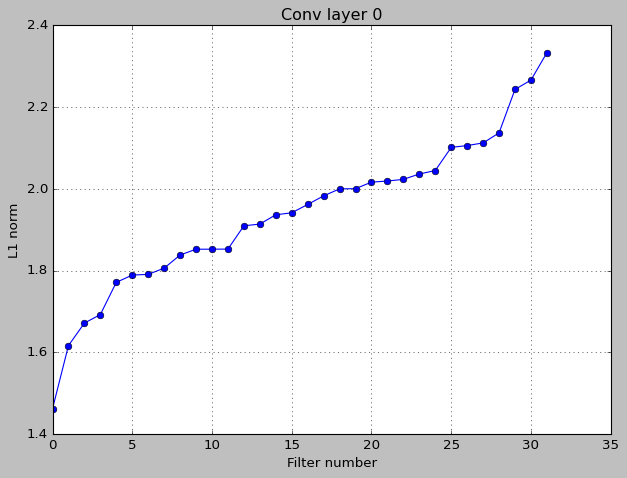

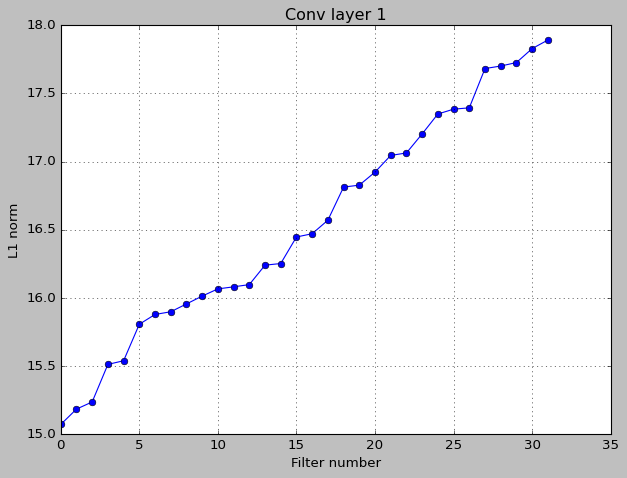

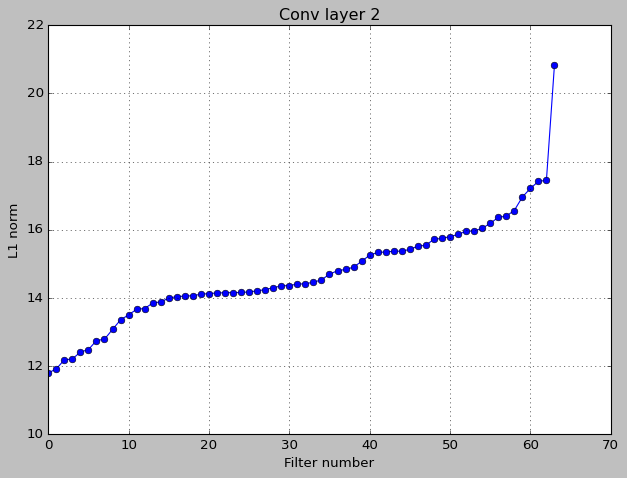

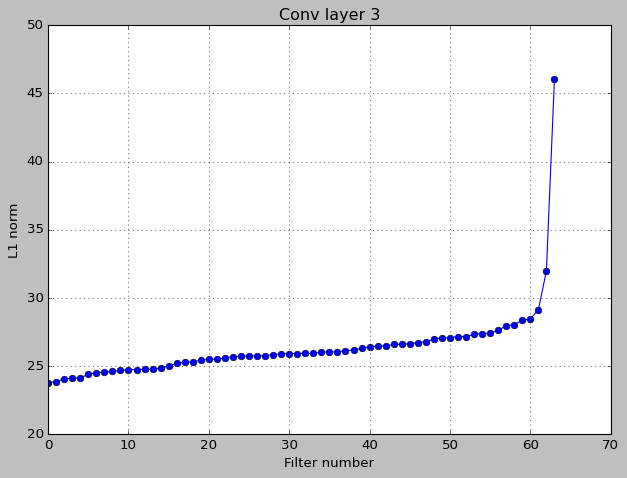

In [9]:
plt.style.use('classic')
layer_prune = {0: 6, 1: 8, 2: 39, 3: 21}
capture_indices = {n:list() for n in range(4)}

# Computing the L1 norm for each filter
for index, layer in enumerate(conv_layers_in_network):
    weights = model.layers[layer].get_weights()[0]
    num_of_filters = weights.shape[-1]
    l1_norm_dict = dict()
    
    for filter_index in range(num_of_filters):
        l1_norm = np.sum(abs(weights[:,:,:, filter_index]))
        l1_norm_dict[str(filter_index)] = l1_norm
        
    # Sorting with respect to ascending l1 norm
    l1_norm_sorted = sorted(l1_norm_dict.items(), key=lambda val: val[1])
    capture_indices[index].extend([channel for channel, l1_norm in l1_norm_sorted[:layer_prune[index]]])
    labels = [val[0] for val in l1_norm_sorted]
    values = [val[1] for val in l1_norm_sorted]
    
    plt.plot(range(num_of_filters), values, marker='o')
    plt.xlabel("Filter number")
    plt.ylabel("L1 norm")
    plt.tight_layout()
    plt.grid(True)
    plt.title("Conv layer {}".format(index))
    plt.show()
        

In [10]:
!pip install kerassurgeon
from kerassurgeon.operations import delete_channels

In [0]:
# Experiment 1
model = network()
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
conv_layer = model.layers[conv_layers_in_network[0]]
model_new = delete_channels(model, model.get_layer(conv_layer.name), channels=[int(index) for index in capture_indices[0]])

model_new.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model_new.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Deleting 6/32 channels from layer: conv2d_5
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 20s 395us/step - loss: 1.8240 - accuracy: 0.3271 - val_loss: 1.5754 - val_accuracy: 0.4320
Epoch 2/50
50000/50000 [==============================] - 19s 377us/step - loss: 1.5196 - accuracy: 0.4484 - val_loss: 1.4553 - val_accuracy: 0.4732
Epoch 3/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.3761 - accuracy: 0.5063 - val_loss: 1.2376 - val_accuracy: 0.5551
Epoch 4/50
50000/50000 [==============================] - 19s 377us/step - loss: 1.2749 - accuracy: 0.5470 - val_loss: 1.1783 - val_accuracy: 0.5811
Epoch 5/50
27872/50000 [===============>..............] - ETA: 7s - loss: 1.2132 - accuracy: 0.5715

In [0]:
# Experiment 2
model = network()
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
conv_layer = model.layers[conv_layers_in_network[1]]
model_new = delete_channels(model, model.get_layer(conv_layer.name), channels=[int(index) for index in capture_indices[1]])

model_new.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_new.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

In [0]:
# Experiment 2
model = network()
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
conv_layer = model.layers[conv_layers_in_network[2]]
model_new = delete_channels(model, model.get_layer(conv_layer.name), channels=[int(index) for index in capture_indices[2]])

model_new.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_new.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

In [0]:
# Experiment 2
model = network()
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
conv_layer = model.layers[conv_layers_in_network[3]]
model_new = delete_channels(model, model.get_layer(conv_layer.name), channels=[int(index) for index in capture_indices[3]])

model_new.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_new.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

In [0]:
# Combining all the experiments
conv_layer = model.layers[conv_layers_in_network[3]]
model_new = delete_channels(model, model.get_layer(conv_layer.name), channels=[int(index) for index in capture_indices[3]])

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)